In [289]:
%pip install -r requirements.txt

import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [290]:
# read file into pandas using a relative path
path = 'data.csv'
df = pd.read_csv(path, header=0, names=['label', 'title'], on_bad_lines='skip')

df.dropna(inplace=True)
df.shape

(2131, 2)

In [291]:
df.head(10)

,label,title
0,positive,"[Walang Pasok] Class suspensions, Monday, Marc..."
1,positive,"[Walang Pasok] Class suspensions, Friday, Marc..."
2,positive,"[Walang Pasok] Class suspensions, Tuesday, Mar..."
3,positive,"[Walang Pasok] Class suspensions, Monday, Marc..."
4,positive,"[Walang Pasok] Class suspensions, EDSA anniver..."
5,positive,‘Walang pasok’ in disaster-prone Philippines c...
6,positive,"Gov’t work, classes suspended in Manila, Pasay..."
7,positive,DepEd revises class and work suspension guidel...
8,positive,"[Walang Pasok] Class suspensions, Monday, Dece..."
9,positive,"[Walang Pasok] Class suspensions, Tuesday, Nov..."


In [292]:
df.label.value_counts()

label
negative    1999
positive     132
Name: count, dtype: int64

In [293]:
df['label_num'] = df.label.map({
    'positive': 1,
    'negative': 0,
})

In [294]:
df.head(10)

,label,title,label_num
0,positive,"[Walang Pasok] Class suspensions, Monday, Marc...",1
1,positive,"[Walang Pasok] Class suspensions, Friday, Marc...",1
2,positive,"[Walang Pasok] Class suspensions, Tuesday, Mar...",1
3,positive,"[Walang Pasok] Class suspensions, Monday, Marc...",1
4,positive,"[Walang Pasok] Class suspensions, EDSA anniver...",1
5,positive,‘Walang pasok’ in disaster-prone Philippines c...,1
6,positive,"Gov’t work, classes suspended in Manila, Pasay...",1
7,positive,DepEd revises class and work suspension guidel...,1
8,positive,"[Walang Pasok] Class suspensions, Monday, Dece...",1
9,positive,"[Walang Pasok] Class suspensions, Tuesday, Nov...",1


In [295]:
X = df.title
y = df.label_num

print(X.shape)
print(y.shape)

(2131,)
(2131,)


In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1598,) (533,) (1598,) (533,)


In [297]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(
    stop_words='english',
    ngram_range=(1,2),
)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [298]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [299]:
y_pred_class = nb.predict(X_test_dtm)

In [300]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9962476547842402

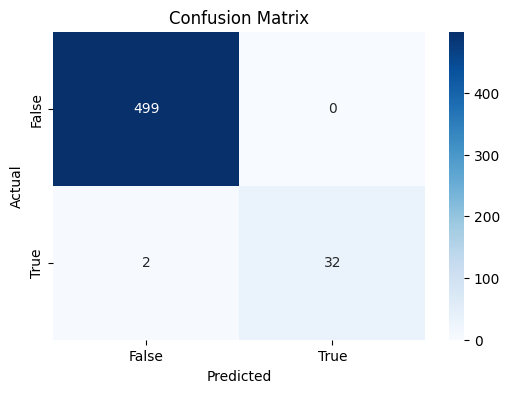

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False', 'True'],
            yticklabels=['False','True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [302]:
misclassified = (y_test != y_pred_class)
error_indices = X_test[misclassified]

# To see the actual and predicted values for these errors:
error_details = pd.DataFrame({
    'Actual': y_test[misclassified],
    'Predicted': y_pred_class[misclassified]
})

print(error_details)

print(X_test[76])

    Actual  Predicted
59       1          0
76       1          0
Taal smog: Students fall ill, Batangas, Cavite, Laguna suspend classes


# Saving the model

In [316]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('classifier', MultinomialNB())
])
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'suspended.joblib')
loaded_pipeline = joblib.load('suspended.joblib')

prediction = loaded_pipeline.predict(['classes are suspended'])
print(prediction)

[1]
